# Histogram

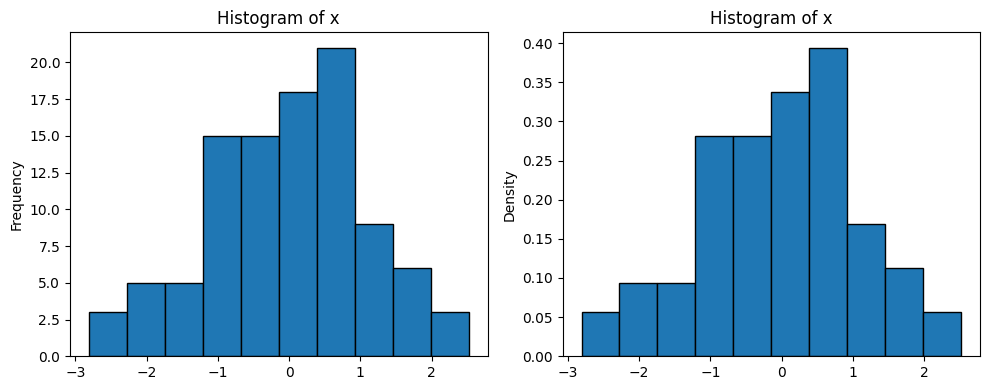

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')

# Generate normal data
x = np.random.normal(size=100)

# Create two histograms: frequencies and densities
plt.figure(figsize=(10, 4))

# Frequency histogram
plt.subplot(1, 2, 1)
plt.hist(x, bins=10, edgecolor='black')
plt.title("Histogram of x")
plt.ylabel("Frequency")

# Density histogram
plt.subplot(1, 2, 2)
plt.hist(x, bins=10, density=True, edgecolor='black')
plt.title("Histogram of x")
plt.ylabel("Density")

plt.tight_layout()
plt.show()

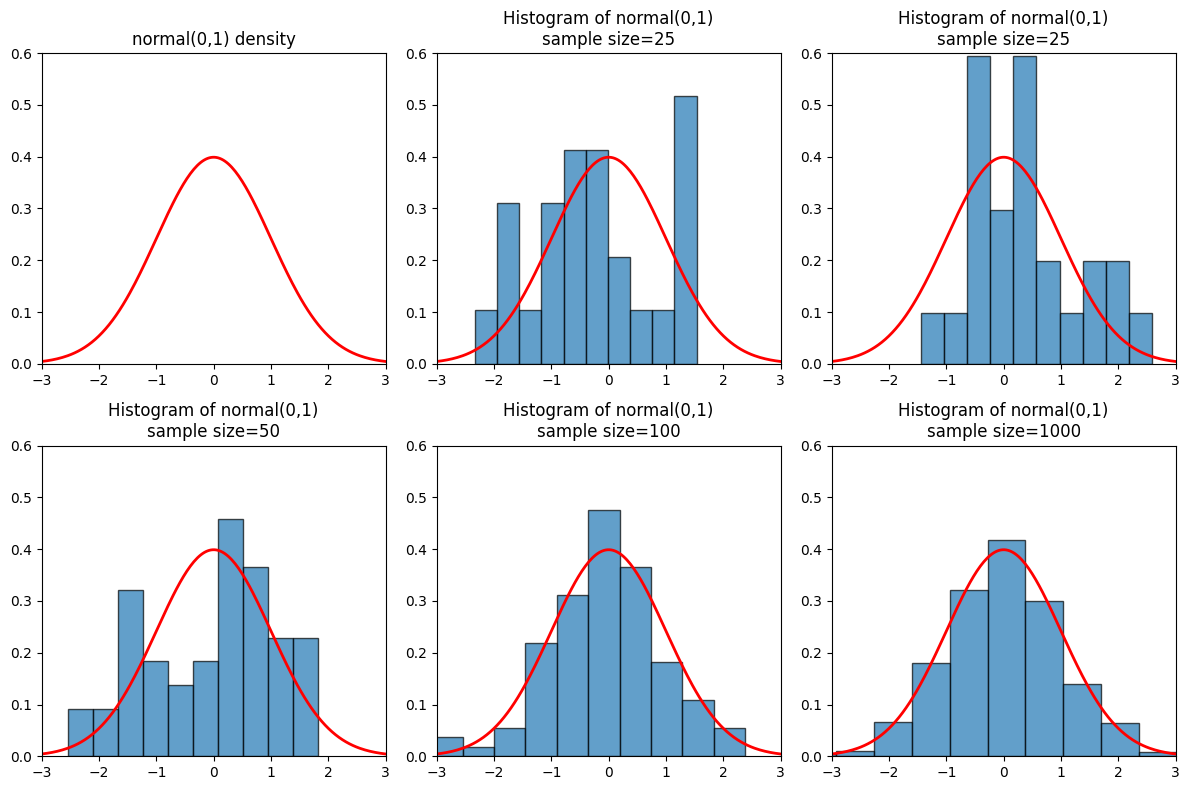

In [2]:
from scipy.stats import norm
# Sample sizes
sizes = [None, 25, 25, 50, 100, 1000]

# Create subplot grid
plt.figure(figsize=(12, 8))

for i, size in enumerate(sizes):
    plt.subplot(2, 3, i + 1)
    x_vals = np.linspace(-3, 3, 200)
    y_vals = norm.pdf(x_vals)  # standard normal density

    if size is None:
        # Top-left: just the density curve
        plt.plot(x_vals, y_vals, 'r-', linewidth=2)
        plt.title("normal(0,1) density")
    else:
        sample = np.random.normal(0, 1, size)
        plt.hist(sample, bins=10, density=True, edgecolor='black', alpha=0.7)
        plt.plot(x_vals, y_vals, 'r-', linewidth=2)
        plt.title(f"Histogram of normal(0,1)\nsample size={size}")

    plt.xlim(-3, 3)
    plt.ylim(0, 0.6)

plt.tight_layout()
plt.show()

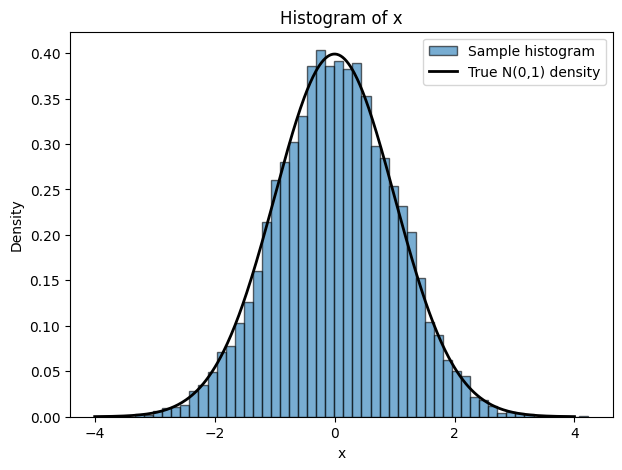

In [3]:
# Generate a histogram with a large sample size (n=10,000) from N(0,1)
x = np.random.normal(loc=0, scale=1, size=10000)

# Plot histogram
plt.figure(figsize=(7, 5))
plt.hist(x, bins=50, density=True, edgecolor='black', alpha=0.6, label='Sample histogram')

# Plot true normal density
x_vals = np.linspace(-4, 4, 500)
plt.plot(x_vals, norm.pdf(x_vals), 'k-', linewidth=2, label='True N(0,1) density')

plt.title("Histogram of x")
plt.xlabel("x")
plt.ylabel("Density")
plt.legend()
plt.show()

# Correlation

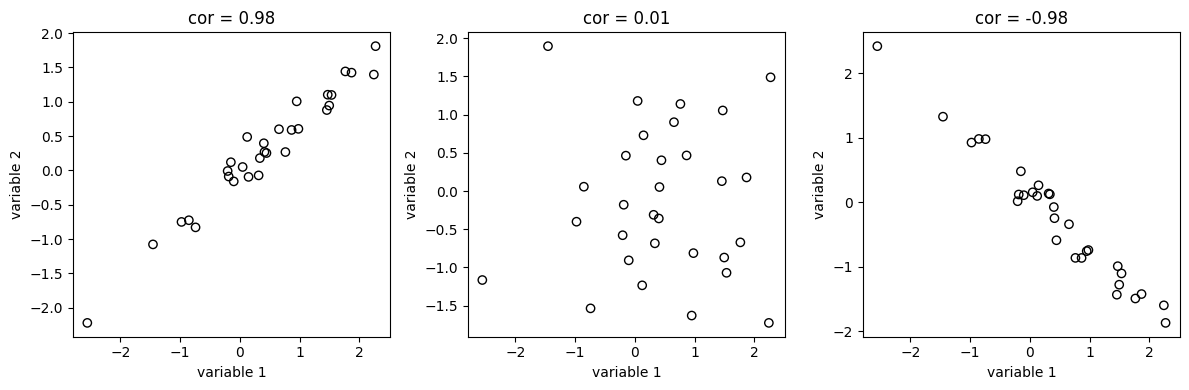

In [4]:
# Generate correlated, uncorrelated, and negatively correlated data
np.random.seed(0)
x = np.random.normal(0, 1, 30)

# Positive correlation
y_pos = 0.8 * x + np.random.normal(0, 0.2, 30)

# No correlation
y_none = np.random.normal(0, 1, 30)

# Negative correlation
y_neg = -0.8 * x + np.random.normal(0, 0.2, 30)

# Plotting
fig, axes = plt.subplots(1, 3, figsize=(12, 4))

datasets = [(x, y_pos, "cor = {:.2f}".format(np.corrcoef(x, y_pos)[0, 1])),
            (x, y_none, "cor = {:.2f}".format(np.corrcoef(x, y_none)[0, 1])),
            (x, y_neg, "cor = {:.2f}".format(np.corrcoef(x, y_neg)[0, 1]))]

for ax, (x_data, y_data, title) in zip(axes, datasets):
    ax.scatter(x_data, y_data, facecolors='none', edgecolors='black')
    ax.set_title(title)
    ax.set_xlabel("variable 1")
    ax.set_ylabel("variable 2")

plt.tight_layout()
plt.show()

# QQ-Plot

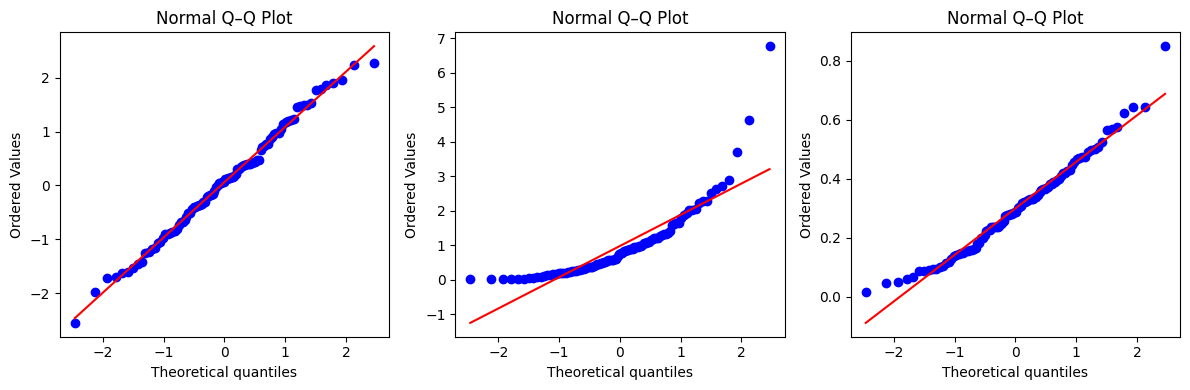

In [5]:
# Generate 3 datasets
np.random.seed(0)
x1 = np.random.normal(loc=0, scale=1, size=100)          # Normal
x2 = np.random.exponential(scale=1, size=100)            # Right-skewed
x3 = np.random.beta(a=2, b=5, size=100)                  # Bounded [0,1], skewed

# Plot QQ-plots
plt.figure(figsize=(12, 4))
datasets = [x1, x2, x3]

for i, data in enumerate(datasets, start=1):
    plt.subplot(1, 3, i)
    stats.probplot(data, dist="norm", plot=plt)
    plt.title("Normal Q–Q Plot")

plt.tight_layout()
plt.show()

# Examples of sample mean

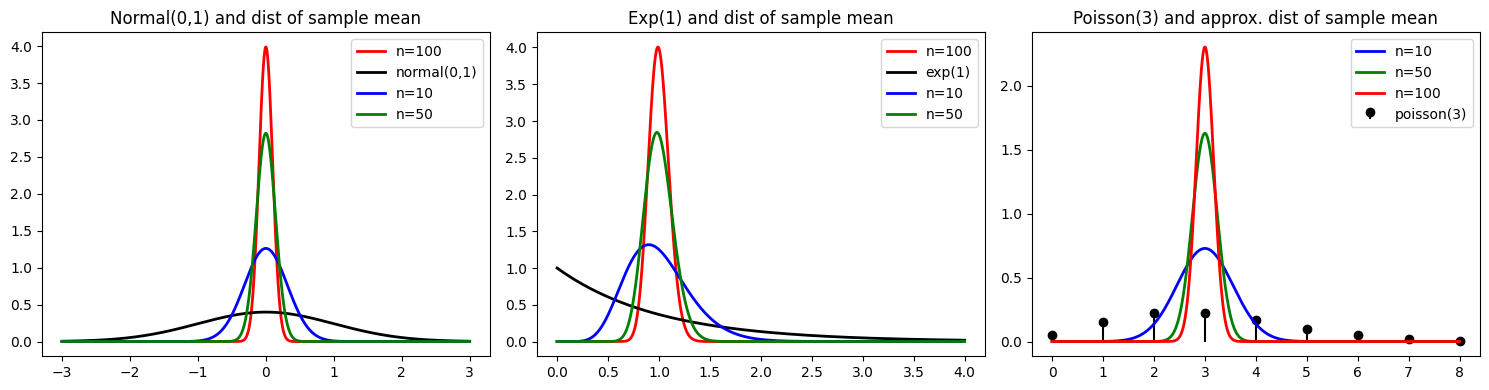

In [6]:
from scipy.stats import norm, gamma, expon, poisson, t
from pathlib import Path
# Load datasets
women = np.loadtxt("lengthswomen.txt")
amsterdam = np.loadtxt("amsterdam.txt")

# ----- Part 1: Sampling Distribution Demonstration -----

# Normal Distribution - Sample Means
u = np.linspace(-3, 3, 1000)
n1, n2, n3 = 10, 50, 100

plt.figure(figsize=(15, 4))
plt.subplot(1, 3, 1)
plt.plot(u, norm.pdf(u, scale=1/np.sqrt(n3)), 'r-', lw=2, label='n=100')
plt.plot(u, norm.pdf(u), 'k-', lw=2, label='normal(0,1)')
plt.plot(u, norm.pdf(u, scale=1/np.sqrt(n1)), 'b-', lw=2, label='n=10')
plt.plot(u, norm.pdf(u, scale=1/np.sqrt(n2)), 'g-', lw=2, label='n=50')
plt.title("Normal(0,1) and dist of sample mean")
plt.legend()

# Gamma Distribution - Sample Means
u = np.linspace(0, 4, 1000)
plt.subplot(1, 3, 2)
plt.plot(u, gamma.pdf(u, n3, scale=1/n3), 'r-', lw=2, label='n=100')
plt.plot(u, expon.pdf(u), 'k-', lw=2, label='exp(1)')
plt.plot(u, gamma.pdf(u, n1, scale=1/n1), 'b-', lw=2, label='n=10')
plt.plot(u, gamma.pdf(u, n2, scale=1/n2), 'g-', lw=2, label='n=50')
plt.title("Exp(1) and dist of sample mean")
plt.legend()

# Poisson Distribution - Sample Means
u = np.linspace(0, 8, 1000)
x = np.arange(9)
plt.subplot(1, 3, 3)
plt.stem(x, poisson.pmf(x, 3), linefmt='k-', markerfmt='ko', basefmt=" ", label='poisson(3)')
plt.plot(u, norm.pdf(u, loc=3, scale=np.sqrt(3/n1)), 'b-', lw=2, label='n=10')
plt.plot(u, norm.pdf(u, loc=3, scale=np.sqrt(3/n2)), 'g-', lw=2, label='n=50')
plt.plot(u, norm.pdf(u, loc=3, scale=np.sqrt(3/n3)), 'r-', lw=2, label='n=100')
plt.title("Poisson(3) and approx. dist of sample mean")
plt.legend()
plt.tight_layout()
plt.show()


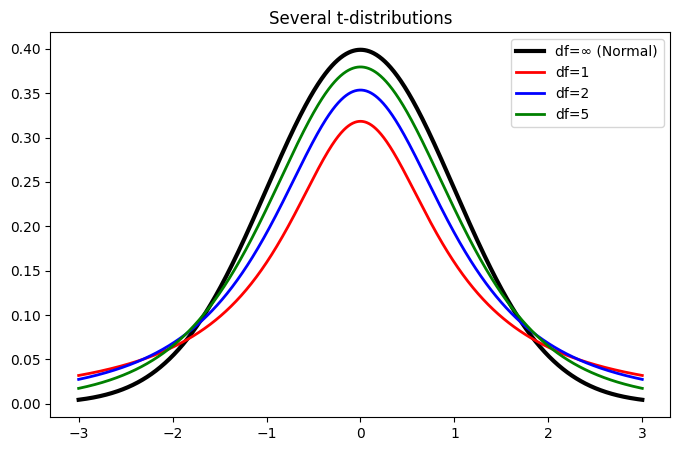

In [7]:
# ----- Part 2: T-distribution Comparison -----

u = np.linspace(-3, 3, 1000)

plt.figure(figsize=(8, 5))
plt.plot(u, norm.pdf(u), 'k-', lw=3, label='df=∞ (Normal)')
plt.plot(u, t.pdf(u, df=1), 'r-', lw=2, label='df=1')
plt.plot(u, t.pdf(u, df=2), 'b-', lw=2, label='df=2')
plt.plot(u, t.pdf(u, df=5), 'g-', lw=2, label='df=5')
plt.title("Several t-distributions")
plt.legend()
plt.show()



## Example t-test – Amsterdam incomes

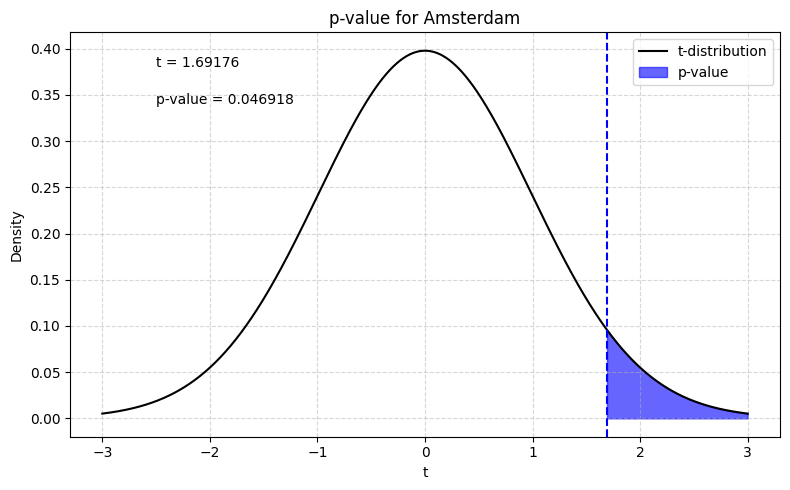

In [8]:
from scipy.stats import t

# Load Amsterdam data
amsterdam = np.loadtxt("amsterdam.txt").flatten()

# Compute statistics
n = len(amsterdam)
mean_val = np.mean(amsterdam)
std_dev = np.std(amsterdam, ddof=1)
test_val = 34500

# Compute t-statistic and p-value
t_stat = (mean_val - test_val) / (std_dev / np.sqrt(n))
p_value = 1 - t.cdf(t_stat, df=n-1)

# Plotting the t-distribution and shading p-value area
x = np.linspace(-3, 3, 1000)
y = t.pdf(x, df=n-1)

plt.figure(figsize=(8, 5))
plt.plot(x, y, 'k-', label="t-distribution")

# Shade area under the curve from t_stat to ∞
x_fill = np.linspace(t_stat, 3, 500)
y_fill = t.pdf(x_fill, df=n-1)
plt.fill_between(x_fill, y_fill, color='blue', alpha=0.6, label="p-value")

# Labels and annotations
plt.title("p-value for Amsterdam")
plt.xlabel("t")
plt.ylabel("Density")
plt.text(-2.5, 0.38, f"t = {t_stat:.5f}", fontsize=10)
plt.text(-2.5, 0.34, f"p-value = {p_value:.6f}", fontsize=10)
plt.axvline(t_stat, color='blue', linestyle='--')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()

plt.tight_layout()
plt.show()

In [9]:
t_stat

np.float64(1.6917647953905945)

In [10]:
p_value

np.float64(0.04691815679988087)

In [11]:
from scipy.stats import ttest_1samp

# Perform one-sided one-sample t-test
# H0: mean = 34500; H1: mean > 34500

# Run two-sided test first
t_statistic, p_two_sided = ttest_1samp(amsterdam, popmean=34500)

# Convert to one-sided p-value (greater)
if t_statistic > 0:
    p_one_sided = p_two_sided / 2
else:
    p_one_sided = 1 - p_two_sided / 2

# Confidence interval: one-sided lower bound using t.ppf
alpha = 0.05
df = n - 1
lower_bound = mean_val - t.ppf(1 - alpha, df) * (std_dev / np.sqrt(n))
confidence_interval = (lower_bound, np.inf)

# Output
{
    "t statistic": t_statistic,
    "degrees of freedom": df,
    "one-sided p-value": p_one_sided,
    "sample mean": mean_val,
    "95% lower bound CI": confidence_interval
}


{'t statistic': np.float64(1.6917647953905945),
 'degrees of freedom': 99,
 'one-sided p-value': np.float64(0.04691815679988082),
 'sample mean': np.float64(36402.279),
 '95% lower bound CI': (np.float64(34535.277608055076), inf)}

In [12]:
#!pip install statsmodels

In [13]:
import statsmodels.stats.weightstats as smw

desc = smw.DescrStatsW(amsterdam)

# Perform one-sided t-test: H0: mean=34500, H1: mean > 34500
t_stat, p_val, df = desc.ttest_mean(value=34500, alternative='larger')

# Calculate one-sided confidence interval (lower bound only)
alpha = 0.05
se = desc.std_mean
lower_bound = desc.mean - t.ppf(1 - alpha, df) * se
conf_int = (lower_bound, np.inf)

# Output
{
    "t statistic": t_stat,
    "degrees of freedom": df,
    "one-sided p-value": p_val,
    "sample mean": desc.mean,
    "95% lower bound CI": conf_int
}

{'t statistic': np.float64(1.691764795390595),
 'degrees of freedom': np.float64(99.0),
 'one-sided p-value': np.float64(0.04691815679988074),
 'sample mean': np.float64(36402.279),
 '95% lower bound CI': (np.float64(34535.277608055076), inf)}

# Examples

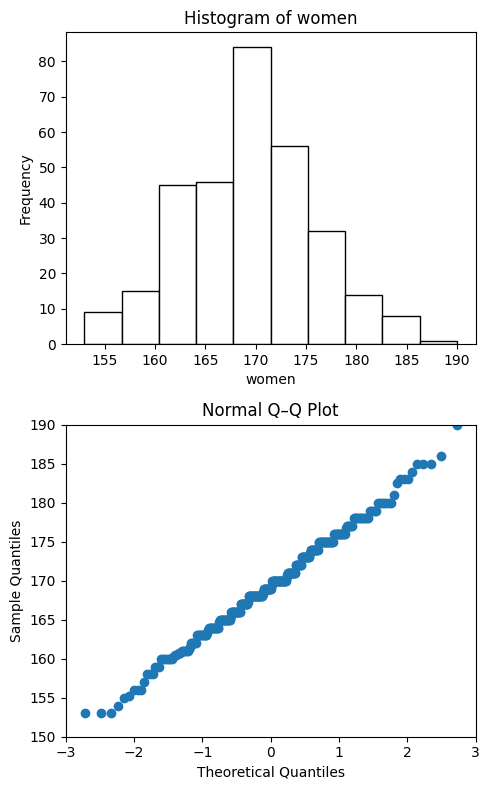

In [14]:
# Flatten the women data in case it was 2D
import statsmodels.api as sm    
women_flat = women.flatten()

fig, axs = plt.subplots(2, 1, figsize=(5, 8))

# Histogram
axs[0].hist(women_flat, bins=10, edgecolor='black', color='white')
axs[0].set_title("Histogram of women")
axs[0].set_xlabel("women")
axs[0].set_ylabel("Frequency")

# Q-Q plot 
sm.qqplot(women_flat, line='45', ax=axs[1])
axs[1].set_title("Normal Q–Q Plot")
axs[1].set_ylim(150, 190)
axs[1].set_xlim(-3, 3)
axs[1].set_ylabel("Sample Quantiles")
axs[1].set_xlabel("Theoretical Quantiles")

plt.tight_layout()
plt.show()

In [15]:
# Basic statistics

n = len(women)
m = women.mean()
s = women.std(ddof=1)
t = stats.t.ppf(0.975, df=n-1)

# 95% confidence interval
ci_lower = m - t * s / np.sqrt(n)
ci_upper = m + t * s / np.sqrt(n)

print(f"Sample size: {n}")
print(f"Mean: {m}")
print(f"Standard deviation: {s}")
print(f"t-value (0.975, df={n-1}): {t}")
print(f"95% Confidence Interval: ({ci_lower:.4f}, {ci_upper:.4f})")


Sample size: 62
Mean: 169.45193548387098
Standard deviation: 6.52560276046665
t-value (0.975, df=61): 1.9996235849949393
95% Confidence Interval: (167.7947, 171.1091)


## Example - trains in time

In [16]:
# Import necessary libraries
from statsmodels.stats.proportion import proportion_confint, samplesize_confint_proportion

alpha = 0.02  # for a 98% confidence interval (1 - alpha = 0.98)
margin_of_error = 0.015
p_hat = 0.95  # given
q_hat = 1 - p_hat

# Calculate the minimal sample size using statsmodels
sample_size_example = samplesize_confint_proportion(p_hat, margin_of_error, alpha=alpha, method='normal')

sample_size_example

np.float64(1142.5110465559173)

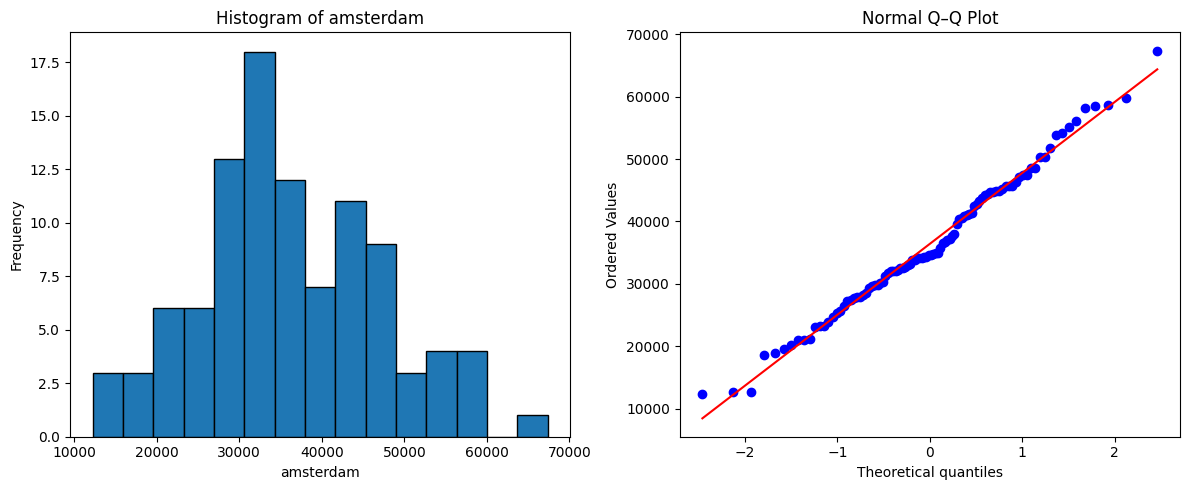

In [17]:
# - Histogram of Amsterdam income - QQ-plot of Amsterdam income

plt.figure(figsize=(12, 5))

# Histogram
plt.subplot(1, 2, 1)
plt.hist(amsterdam, bins=15, edgecolor='black')
plt.title("Histogram of amsterdam")
plt.xlabel("amsterdam")
plt.ylabel("Frequency")

# QQ-plot
plt.subplot(1, 2, 2)
stats.probplot(amsterdam, dist="norm", plot=plt)
plt.title("Normal Q–Q Plot")

plt.tight_layout()
plt.show()

In [18]:
import pandas as pd
from statsmodels.stats.proportion import proportions_ztest

# === Load Datasets ===
amsterdam = np.loadtxt('amsterdam.txt').flatten()
rotterdam = np.loadtxt('rotterdam.txt').flatten()
income = pd.read_csv('income.txt', sep=r"\s+")
parcels = pd.read_csv('parcels.txt', sep=r"\s+")
taxcouple = pd.read_csv("taxcouple.txt", sep=r"\s+")

# === Binomial and Proportion Tests ===
print("Binomial test 89/100 (p=0.95):")
print(stats.binomtest(89, 100, p=0.95, alternative='two-sided'))

stat, pval = proportions_ztest(89, 100, value=0.95)
print("Proportion z-test 89/100 (p=0.95):", stat, pval)

print(stats.binomtest(890, 1000, p=0.95, alternative='two-sided'))
stat, pval = proportions_ztest(890, 1000, value=0.95)
print("Proportion z-test 890/1000 (p=0.95):", stat, pval)

Binomial test 89/100 (p=0.95):
BinomTestResult(k=89, n=100, alternative='two-sided', statistic=0.89, pvalue=0.01739293928781874)
Proportion z-test 89/100 (p=0.95): -1.9176083163017779 0.055160694847372425
BinomTestResult(k=890, n=1000, alternative='two-sided', statistic=0.89, pvalue=3.786311417943763e-14)
Proportion z-test 890/1000 (p=0.95): -6.064009939594211 1.327689444731665e-09


Shapiro test on normal sample: ShapiroResult(statistic=np.float64(0.9854812804340711), pvalue=np.float64(0.3438060985969895))


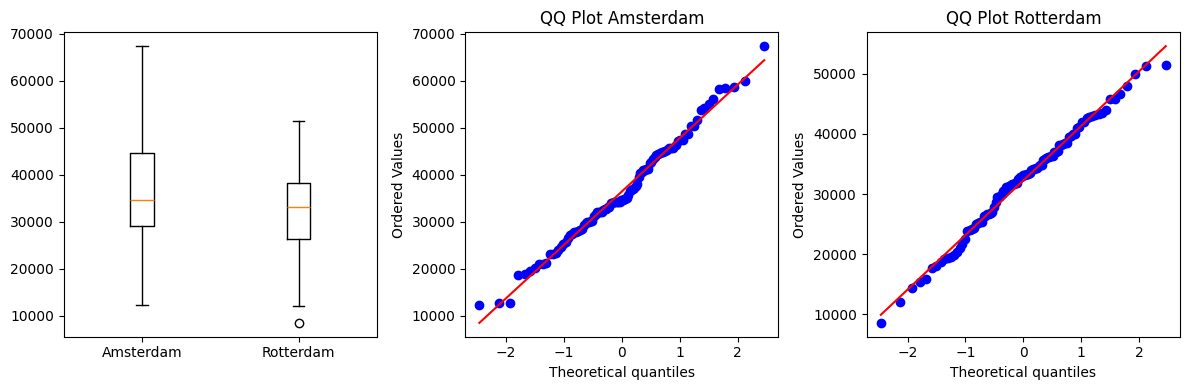

Amsterdam mean, sd, n: 36402.279 11244.346762522648 100
Rotterdam mean, sd, n: 32257.9579 8984.440159807858 100
Shapiro test Amsterdam: ShapiroResult(statistic=np.float64(0.9884761389099086), pvalue=np.float64(0.5439494488644457))
Shapiro test Rotterdam: ShapiroResult(statistic=np.float64(0.99040095310556), pvalue=np.float64(0.6970062617516154))
T-test (Welch): TtestResult(statistic=np.float64(2.879420973742729), pvalue=np.float64(0.004422232057504286), df=np.float64(198.0))
T-test (equal var): TtestResult(statistic=np.float64(2.879420973742729), pvalue=np.float64(0.004422232057504286), df=np.float64(198.0))


In [19]:
# === Normality Test Example ===
x = np.random.normal(size=100)
print("Shapiro test on normal sample:", stats.shapiro(x))

# === Amsterdam vs Rotterdam Incomes ===
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.boxplot([amsterdam, rotterdam], labels=['Amsterdam', 'Rotterdam'])
plt.subplot(1, 3, 2)
stats.probplot(amsterdam, dist="norm", plot=plt)
plt.title("QQ Plot Amsterdam")
plt.subplot(1, 3, 3)
stats.probplot(rotterdam, dist="norm", plot=plt)
plt.title("QQ Plot Rotterdam")
plt.tight_layout()
plt.show()

print("Amsterdam mean, sd, n:", np.mean(amsterdam), np.std(amsterdam, ddof=1), len(amsterdam))
print("Rotterdam mean, sd, n:", np.mean(rotterdam), np.std(rotterdam, ddof=1), len(rotterdam))
print("Shapiro test Amsterdam:", stats.shapiro(amsterdam))
print("Shapiro test Rotterdam:", stats.shapiro(rotterdam))
print("T-test (Welch):", stats.ttest_ind(amsterdam, rotterdam))
print("T-test (equal var):", stats.ttest_ind(amsterdam, rotterdam, equal_var=True))

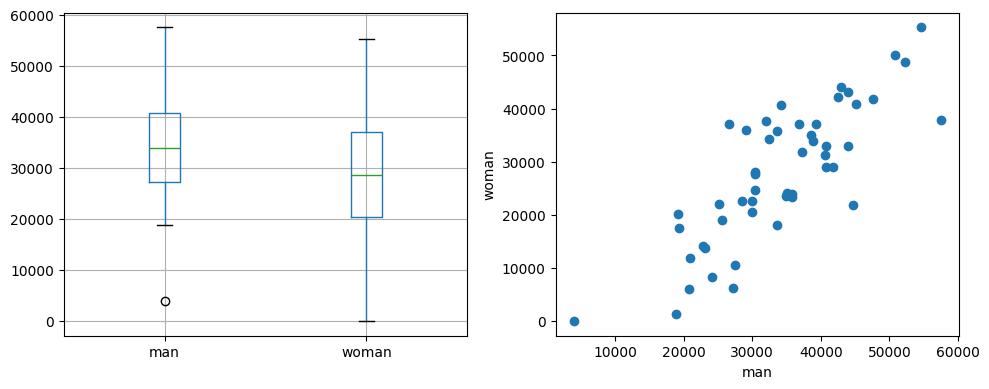

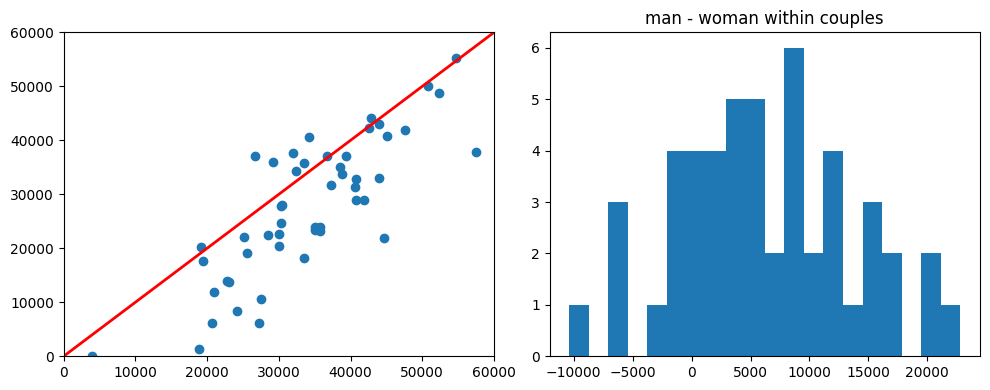

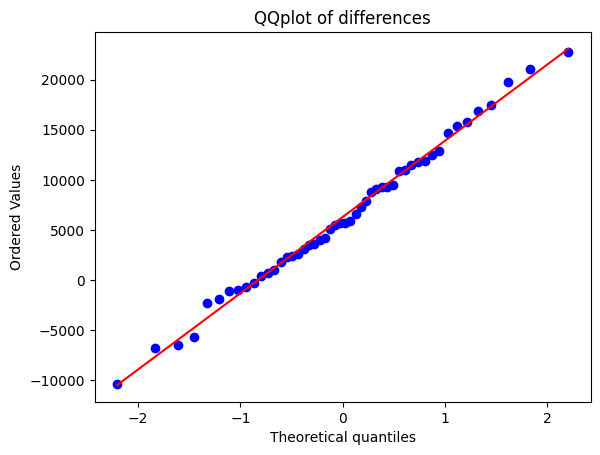

Paired t-test: TtestResult(statistic=np.float64(5.984922280668189), pvalue=np.float64(2.468986958930645e-07), df=np.int64(49))
T-test on differences: TtestResult(statistic=np.float64(5.984922280668189), pvalue=np.float64(2.468986958930645e-07), df=np.int64(49))


In [20]:
# === Tax Couples Analysis ===
man = taxcouple["man"]
woman = taxcouple["woman"]

plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
taxcouple.boxplot()
plt.subplot(1, 2, 2)
plt.scatter(man, woman)
plt.xlabel("man")
plt.ylabel("woman")
plt.tight_layout()
plt.show()

d = man - woman
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.scatter(man, woman)
plt.plot([0, 60000], [0, 60000], color='red', linewidth=2)
plt.xlim([0, 60000])
plt.ylim([0, 60000])
plt.subplot(1, 2, 2)
plt.hist(d, bins=20)
plt.title("man - woman within couples")
plt.tight_layout()
plt.show()

plt.figure()
stats.probplot(d, dist="norm", plot=plt)
plt.title("QQplot of differences")
plt.show()

print("Paired t-test:", stats.ttest_rel(man, woman))
print("T-test on differences:", stats.ttest_1samp(d, 0))